#Diabetes dataset using k-Nearest Neighbors

In this notebook, we will be analyzing a numerical content-heavy dataset that has a large sample of females with diabetes and without diabetes.
We will be implementing the k-Nearest Neighbors algorithm for this dataset and constructing a prediction model using this classifier.

What we will learn in this notebook:
*   How to read and clean the data
*   Creating visualization to interpret the data
*   Understanding k-Nearest Neighbors classifier
*   How to find the best value for k

Dataset retrieved from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

##Reading our data

Lets start off by importing and reading our data.

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.io import output_notebook
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Note: the outcome columns shows if the sample has diabetes or not. 1 means yes and 0 means no. Also, DiabetesPedigreeFunction column expresses the diabetes percentage

We can use .describe() funciton to quickly get some statistical inferences of our data.


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Using info() function to check for nulls.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()# We can also use this function to check for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summarizing our quick findings:
- Our dataset consists of 768 samples/rows
- We have 2 float64 columns and the rest our int64
- We do not have any missing values, no nulls

##Creating Visualization to understand our Data

Lets start simple and create some quick visualization. In our sample, there are only people with or without diabetes. So lets take a look at our data distribution.

0    500
1    268
Name: Outcome, dtype: int64

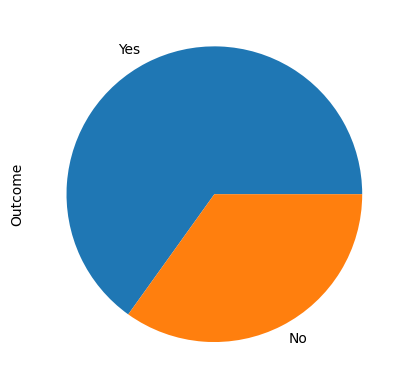

In [ ]:

counts = df['Outcome'].value_counts()
labels = ['Yes', 'No']
counts.plot.pie(labels=labels)
counts

Note: keep in mind these numbers, as our datasets can be an unbalanced dataset.

Age distribution

array([<Axes: ylabel='Frequency'>], dtype=object)

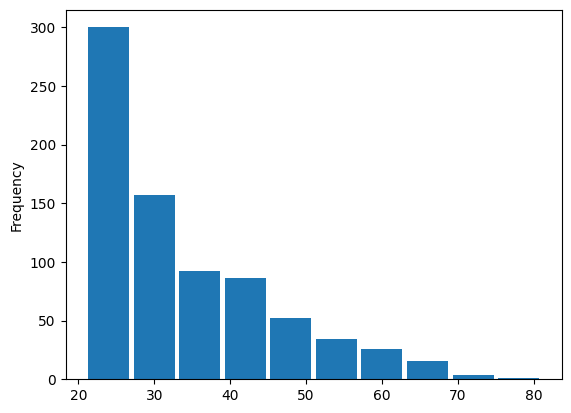

In [ ]:
df['Age'].plot.hist(subplots=True, rwidth=0.9)

Challenge: is this dataset balanced based on the age distribution? Explain your answer

Answer: the answer can either be yes or no depending on the explaination. No if the dataset is used with the full range of ages. Yes if we only take out a certain range such as 20-30 years.

**Challenge:** Create a new histogram to show the frequency of pregnancies

**Answer:**

array([<Axes: ylabel='Frequency'>], dtype=object)

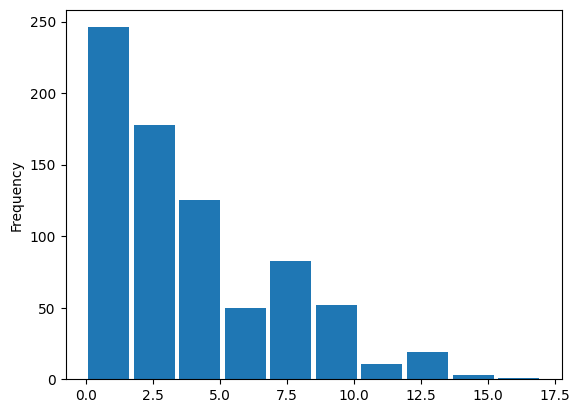

In [ ]:
df['Pregnancies'].plot.hist(subplots=True, rwidth=0.9)

Comparing the ages in diabetes and without diabetes

In [ ]:
outcome = df['Outcome']
diabetes_data = df[outcome == 1]
nodiabetes_data = df[outcome == 0]
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## k-nearest Neighbors (KNN)

k-Nearest Neighbors or KNN is a supervised machine learning algorithm that is commmonly used for classification tasks. For our dataset here, we can use KNN to predict for diabetes. The algorithm works by identifying nearest data points when given a new data point that we want to classify.
  
Lets import some of the important tools and libraries and get started!

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



The first step is to preprocess our data and train our model.

We have to standardize our features and bring them all to a similar scale. We can do this by using the **StandardScaler(**) function. As our KNN is distance-based and the features with a larger scales may dominate the distance calculation.

In [ ]:
num_cols = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness',	'Insulin', 'BMI',	'DiabetesPedigreeFunction',	'Age'] # Selecting our inputs variables
scaler = StandardScaler()

X = scaler.fit_transform(df[num_cols])
y = df['Outcome'] # Selecting our outputs variables



**Challenge**: Which other Scaling method can be used?

**Answer:** There are multiple method that can be used. Common scaling methods include **MinMaxScaler()**, and **RobustScaler()**. Do understand that each scaling method are different and choose the method that best fit the data.

Next, lets split our data to training and testing data. 20% of our data will be for testing and the other 80% will be for training our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2) # 80% of our data will be training, with the remaining 20% will be for our testing data.
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now lets take a look at how well our model is performing.

In [ ]:
# Make predictions on the test data
y_pred = KNN.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       106
           1       0.57      0.62      0.59        48

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.74      0.73      0.74       154



The accuracy scores we obtain is a little bit low and there are definitely room for improvement. Therefore, one of the best ways to improve our KNN calssifier is to find the best value for k!

## Finding the best value for k



One of the critical steps to ensure the effectiveness of our model is the selection of an optimal value for 'k.' There are multiple approaches to determine the best 'k' value, and we will explore two of these methods: cross-validation and grid search.

###Cross-validation method

**Cross-validation** is a simple method that provides a good estaimte of how well our model can generalize to unseen data. By splitting our training data into multiple folds, we can evaluate the average accuracy score for our model.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

knn = KNeighborsClassifier(n_neighbors=3)
num_folds = 5  #Defining the number of splits or folds for our cross-validation

# Create a KFold object to control how the data is split
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Perform cross-validation and collect the results (e.g., accuracy)
cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

#Checking the cross-validation scores and their mean
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.74675325 0.7012987  0.76623377 0.73856209 0.74509804]
Mean accuracy: 0.7395891690009337


We can see the scores for our cross-validation and mean between all of the scores.

Now, we want to loop through a range of possible k values to find the most optimal k value that can give us the best accuracy.

In [ ]:

# Define the range of K values you want to test
k_values = range(1, 25)  # For example, test K from 1 to 20

# Create an empty list to store cross-validation scores for each K
cv_scores = []

# Perform cross-validation for each K
for k in k_values:
    # Create a KNeighborsClassifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Define the number of folds
    num_folds = 5  # We will use 5 folds for our cross-validation (keep this consistent)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

    # Perform cross-validation and collect the results (e.g., accuracy)
    cross_val_accuracy = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

    # Calculate the mean accuracy for this K
    mean_accuracy = np.mean(cross_val_accuracy)

    # Append the mean accuracy to the list of cross-validation scores
    cv_scores.append(mean_accuracy)

# Find the optimal K that maximizes cross-validation accuracy
optimal_k = k_values[np.argmax(cv_scores)]

# Print the cross-validation scores for each K
for k, accuracy in zip(k_values, cv_scores):
    print(f"K={k}: Mean Accuracy={accuracy}")

# Print the optimal K
print(f"Optimal K: {optimal_k}")

K=1: Mean Accuracy=0.7122655122655124
K=2: Mean Accuracy=0.7148544266191326
K=3: Mean Accuracy=0.7395891690009337
K=4: Mean Accuracy=0.7278414396061456
K=5: Mean Accuracy=0.7278414396061456
K=6: Mean Accuracy=0.725244037008743
K=7: Mean Accuracy=0.7343604108309991
K=8: Mean Accuracy=0.7343179696120872
K=9: Mean Accuracy=0.7330532212885155
K=10: Mean Accuracy=0.7291061879297175
K=11: Mean Accuracy=0.7369323486970546
K=12: Mean Accuracy=0.7395467277820219
K=13: Mean Accuracy=0.7460572107630931
K=14: Mean Accuracy=0.739572192513369
K=15: Mean Accuracy=0.7486546133604957
K=16: Mean Accuracy=0.7447330447330447
K=17: Mean Accuracy=0.7486291486291486
K=18: Mean Accuracy=0.7486546133604957
K=19: Mean Accuracy=0.7512605042016807
K=20: Mean Accuracy=0.7512689924454631
K=21: Mean Accuracy=0.7552075375604788
K=22: Mean Accuracy=0.7473813767931415
K=23: Mean Accuracy=0.7538918597742128
K=24: Mean Accuracy=0.7486885663356252
Optimal K: 21


Lets take a look at our accuracy scores between all these k values. A K value of 21 will give us the best accuracy!
This method is easy and fast to perform, however some limitation to this method is that we may not be able to explore the entire hyperparameter that KNN can offer.

A better method that allow us to search through the hyperparameter space is using the Grid Search method.

###Grid Search
**GridSearchCV()** has many advantages when we understand the hyperparameters space of our KNN classifier. We are able to set options for our hyperparamter and let Grid search choose the ones that gives us the best scores. This method is suitable for fine-tuning our model but needs more computational power.


First, we have to set up the hyperparameters we would like to search through. There are many different type of hyperparameters and options in our KNN classifier. For now we will be only changing two for this example.

Here we have two hyperparamters:
- n_neighbors to find our optimal k.
-metric hyperparameter will be used for the distance metric for KNN.


In [ ]:
param_grid = {'n_neighbors': range(1, 25), 'metric': ['euclidean', 'manhattan', 'minkowski']} #Creating a grid of hyperparameters to serach through
param_grid

{'n_neighbors': range(1, 25),
 'metric': ['euclidean', 'manhattan', 'minkowski']}




**Challenge:** Try using different hyperparameters to achieve a higher accuracy score!

**Solution:** Hyperparameters such as algorithm and leaf_size can be used.

Now we will use **GridSearchCV()** to find the best combination of hyperparameters.

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) # keep cv = 5, cv is our folds for cross validation
grid_search.fit(X_train, y_train) #Inputing our training data
optimal_k = grid_search.best_params_['n_neighbors']
optimal_m = grid_search.best_params_['metric']

print(f"Optimal K: {optimal_k}")
print(f"Optimal metric: {optimal_m}")

Optimal K: 23
Optimal metric: manhattan


We can see that our optimal K is 23 with our optimal metric as manhattan. So lets use these hyperparameters to run our KNN classifier again!

In [ ]:
NewKNN =  KNeighborsClassifier(n_neighbors=23, metric = 'manhattan')
NewKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

In [ ]:
# Make predictions on the test data
y_pred = NewKNN.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.68      0.48      0.56        48

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.76      0.77      0.75       154



We can see that our scores are slightly better compared to what we had before, this is a good sign that there is still improvement in our model.

 All in all, we might not think there is much improvement overall,  our use of cross-validation,, by looping through 1-24 k values, reveals that the maximum accuracy scores were achieved at 75%. However, even a slight increase in our accuracy score was seen after adjusting a single hyperparameter. With further fine-tuning and customization of other hyperparameters, there is certainly room for improvement in our model.